In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [20]:
df=pd.read_csv('D:\DataSets\diabetes_prediction_dataset.csv.zip')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [56]:
df.shape

(100000, 9)

In [21]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### 0--> Non-Diabetic Patients
### 1--> Diabetic Patients

In [22]:
df2=df.query('diabetes == 1')
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


# This Table represents that around 8500 people are diabetic

In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [24]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Changing Data Type 

In [26]:
df = df.astype({'age': int})

#  Countplot for identifying exactly how many people and which gender have more diabitic patients

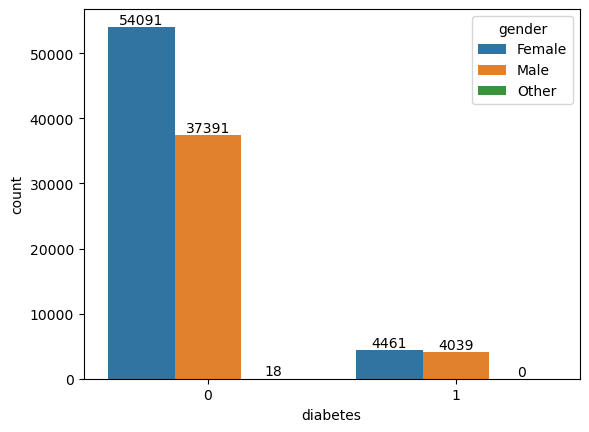

In [27]:
gen=sns.countplot(x='diabetes',data=df,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

# Percentage of Non_diabetic vs Diabetic patients

Text(0.5, 1.0, 'Distribution of diabeties in dataset')

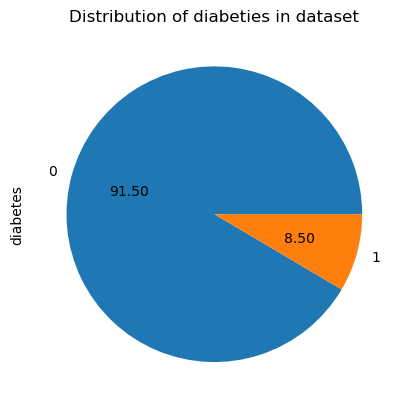

In [28]:
import matplotlib.pyplot as plt
df['diabetes'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title("Distribution of diabeties in dataset")

#  train/test/split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:8],df.iloc[:,-1],test_size=0.3,stratify=df.iloc[:,-1],random_state=42)

X_train.shape,X_test.shape

((70000, 8), (30000, 8))

In [36]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
54534,Female,56,0,1,never,39.51,4.0,100
7286,Male,64,0,0,former,27.32,6.6,90
44496,Male,49,0,0,never,42.26,6.0,240
86010,Male,68,0,0,No Info,27.32,4.8,85
44954,Male,62,0,0,not current,30.64,5.7,145


# One Hot Encoding
## To Transform the categorical column into numerical column

In [39]:
trf1= ColumnTransformer([
    ('ohe_gender_smokinghistory',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,4])
],remainder='passthrough')

# Scaling
## To scale down the values between range [-1 to 1]

In [40]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,15))
])

# Training The Model 
## Using DecisionTreeClassifier algorithm to train the model 

In [41]:
trf3 = DecisionTreeClassifier()

# Creating Pipeline

In [42]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [43]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3)

In [51]:
#train
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gender_smokinghistory',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [45]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

# Checking Accuracy of Training Dataset 

In [67]:
y_pred1=pipe.predict(X_train)
print("Accuracy of Training data set is : ",accuracy_score(y_train,y_pred1))

# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())


Accuracy of Training data set is :  0.9992285714285715
Accuracy after Cross Validation : 0.9511428571428571


# Checking Accuracy of Test Dataset

In [69]:
#Predict
y_pred = pipe.predict(X_test)
print("Accuracy of Test data set is : ",accuracy_score(y_test,y_pred))

# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_test, y_test, cv=5, scoring='accuracy').mean())

Accuracy of Test data set is :  0.9527333333333333
Accuracy after Cross Validation : 0.9528666666666666


In [70]:
import pickle
pickle.dump(pipe,open('pipe.pkl1','wb'))